In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## PreProcessing Data

In [2]:
#import data 2023
data_banjir2023 = pd.read_csv("Data Kejadian Bencana Banjir Tahun 2023.csv", delimiter=";")
data_banjir2023.head()

,periode_data,bulan,wilayah,kecamatan,kelurahan,jumlah_rata_rata_ketinggian_air,jumlah_rw_terdampak,jumlah_kk_terdampak,jumlah_jiwa_terdampak,jumlah_kejadian,jumlah_korban_meninggal,jumlah_korban_luka,jumlah_pengungsi,jumlah_tempat_pengungsian,nilai_kerugian
0,202303,2,JAKARTA SELATAN,KEBAYORAN LAMA,GROGOL SELATAN,50 cm,2,0,0,1,0,0,0,0,0
1,202303,2,JAKARTA SELATAN,KEBAYORAN LAMA,KEBAYORAN LAMA SELATAN,20 cm,1,0,0,1,0,0,0,0,0
2,202303,2,JAKARTA SELATAN,MAMPANG PRAPATAN,PELA MAMPANG,25 s.d 40 cm,1,0,0,1,0,0,0,0,0
3,202303,2,JAKARTA SELATAN,MAMPANG PRAPATAN,TEGAL PARANG,40 cm,1,0,0,1,0,0,0,0,0
4,202303,2,JAKARTA SELATAN,MAMPANG PRAPATAN,KUNINGAN BARAT,30 s.d 60 cm,3,0,0,1,0,0,0,0,0


In [3]:
# import data 2024
data_banjir2024 = pd.read_csv("Data Kejadian Bencana Banjir Tahun 2024.csv", delimiter=";")
data_banjir2024 = data_banjir2024.drop(columns="triwulan",axis=1)
data_banjir2024.head()

,periode_data,bulan,wilayah,kecamatan,kelurahan,jumlah_rata_rata_ketinggian_air,jumlah_rw_terdampak,jumlah_kk_terdampak,jumlah_jiwa_terdampak,jumlah_kejadian,jumlah_korban_meninggal,jumlah_korban_luka,jumlah_pengungsi,jumlah_tempat_pengungsian,nilai_kerugian
0,202403,1,jakarta barat,cengkareng,cengkareng timur,30 s.d 40 cm,2,0,0,2,0,0,0,0,0
1,202403,1,jakarta barat,kembangan,joglo,30 s.d 40 cm,1,0,0,1,0,0,0,0,0
2,202403,1,jakarta barat,kali deres,kamal,30 cm,1,0,0,1,0,0,0,0,0
3,202403,1,jakarta barat,cengkareng,kapuk,30 cm,1,0,0,1,0,0,0,0,0
4,202403,1,jakarta barat,cengkareng,kedaung kali angke,30 s.d 40 cm,2,0,0,3,0,0,0,0,0


In [4]:
# Nge-gabungin data
banjir_combined = pd.concat([data_banjir2023, data_banjir2024], ignore_index=True)
banjir_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   periode_data                     276 non-null    int64 
 1   bulan                            276 non-null    int64 
 2   wilayah                          276 non-null    object
 3   kecamatan                        276 non-null    object
 4   kelurahan                        276 non-null    object
 5   jumlah_rata_rata_ketinggian_air  276 non-null    object
 6   jumlah_rw_terdampak              276 non-null    object
 7   jumlah_kk_terdampak              276 non-null    object
 8   jumlah_jiwa_terdampak            276 non-null    object
 9   jumlah_kejadian                  276 non-null    object
 10  jumlah_korban_meninggal          276 non-null    object
 11  jumlah_korban_luka               276 non-null    object
 12  jumlah_pengungsi                 276

In [5]:
#buat data framenya
banjir_df = pd.DataFrame(banjir_combined)

In [6]:
# ngebuat kolom kecamatan jadi kapital
banjir_df["kecamatan"] = banjir_df["kecamatan"].str.upper()

In [7]:
banjir_df = banjir_df.dropna()
banjir_df_nihil = banjir_df[(banjir_df['kecamatan'] == 'NIHIL')].index
banjir_df_nan = banjir_df[(banjir_df['kecamatan'] == '-')].index
banjir_df_0 = banjir_df[(banjir_df['jumlah_rata_rata_ketinggian_air'] == '0 cm')].index
banjir_df.drop(banjir_df_nihil, inplace=True)
banjir_df.drop(banjir_df_nan, inplace=True)
banjir_df.drop(banjir_df_0, inplace=True)

In [8]:
banjir_df['kecamatan'] = banjir_df['kecamatan'].replace('KALI DERES', 'KALIDERES')

In [9]:
#drop kolom yang ngga diminta sama ibunya
banjir_df = banjir_df.drop(columns="bulan",axis=1)
banjir_df = banjir_df.drop(columns="wilayah",axis=1)
banjir_df = banjir_df.drop(columns="kelurahan",axis=1)
banjir_df = banjir_df.drop(columns="jumlah_rata_rata_ketinggian_air",axis=1)
banjir_df = banjir_df.drop(columns="jumlah_korban_meninggal",axis=1)
banjir_df = banjir_df.drop(columns="jumlah_korban_luka",axis=1)
banjir_df = banjir_df.drop(columns="nilai_kerugian",axis=1)

In [10]:
banjir_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 0 to 275
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   periode_data               259 non-null    int64 
 1   kecamatan                  259 non-null    object
 2   jumlah_rw_terdampak        259 non-null    object
 3   jumlah_kk_terdampak        259 non-null    object
 4   jumlah_jiwa_terdampak      259 non-null    object
 5   jumlah_kejadian            259 non-null    object
 6   jumlah_pengungsi           259 non-null    object
 7   jumlah_tempat_pengungsian  259 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.2+ KB


In [11]:
banjir_df = banjir_df.dropna()
banjir_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 0 to 275
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   periode_data               259 non-null    int64 
 1   kecamatan                  259 non-null    object
 2   jumlah_rw_terdampak        259 non-null    object
 3   jumlah_kk_terdampak        259 non-null    object
 4   jumlah_jiwa_terdampak      259 non-null    object
 5   jumlah_kejadian            259 non-null    object
 6   jumlah_pengungsi           259 non-null    object
 7   jumlah_tempat_pengungsian  259 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.2+ KB


In [12]:
# ngubah kolom str jadi int
for col in banjir_df.columns:
    if col != 'kecamatan':
        banjir_df[col] = banjir_df[col].apply(lambda x: '0' if x == '-' or x == '' else x)
        banjir_df[col] = banjir_df[col].astype(int)
            

In [13]:
# menghapus data 202306 202309 kalau mau, tapi gw biarin dlu sampai pca
# banjir_df = banjir_df[~banjir_df['periode_data'].isin([202306, 202309])]
# banjir_df.info()

## Plot cek outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4d8750550>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4d8769150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4d8751190>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4d8798b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4d87995d0>],
 'means': []}

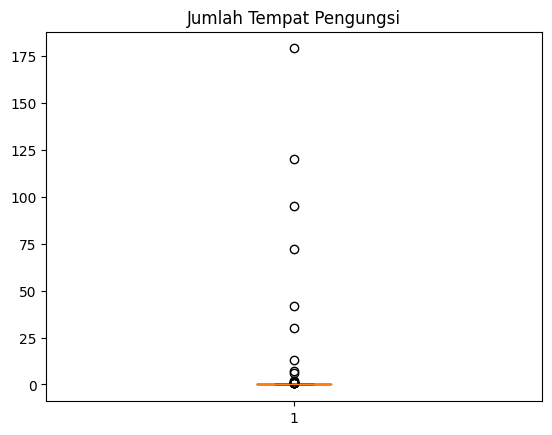

In [14]:
fig, ax = plt.subplots()
ax.set_title('Jumlah Tempat Pengungsi')
ax.boxplot(banjir_df['jumlah_tempat_pengungsian'])

## Melakukan Pivot

##### agar tabel sesuai dengan apa yg ibu minta

In [15]:
banjir_df2 = banjir_df.groupby(['kecamatan', 'periode_data']).sum().reset_index()
banjir_df1 = banjir_df2.pivot(index='kecamatan', columns='periode_data', values=['jumlah_rw_terdampak','jumlah_kk_terdampak','jumlah_jiwa_terdampak','jumlah_kejadian','jumlah_pengungsi','jumlah_tempat_pengungsian'])
banjir_df1 = banjir_df1.fillna(0)

In [16]:
banjir_df1

jumlah_rw_terdampak                       \
periode_data                   202303 202306 202309 202403   
kecamatan                                                    
CAKUNG                            5.0    0.0    0.0    4.0   
CENGKARENG                       12.0    0.0    0.0   26.0   
CILANDAK                          3.0    0.0    0.0   10.0   
CILINCING                         4.0    0.0    1.0    6.0   
CIPAYUNG                          0.0    7.0    0.0    1.0   
CIRACAS                           4.0    1.0    0.0    3.0   
DUREN SAWIT                       6.0    0.0    0.0    0.0   
GROGOL PETAMBURAN                 1.0    0.0    0.0    2.0   
JAGAKARSA                         0.0    2.0    0.0    3.0   
JATINEGARA                       10.0    9.0    0.0   19.0   
KALIDERES                        14.0    0.0    0.0   20.0   
KEBAYORAN BARU                    6.0    2.0    0.0    6.0   
KEBAYORAN LAMA                    8.0    0.0    2.0    6.0   
KEBON JERUK                      13.0    3.0    0.0   10.0   
KELAPA GADING                     0.0    0.0    0.0    1.0   
KEMBANGAN                         8.0    1.0    0.0   12.0   
KOJA                              1.0    0.0    0.0    0.0   
KRAMAT JATI                      17.0   11.0    0.0   16.0   
MAKASAR                           0.0    4.0    0.0    9.0   
MAMPANG PRAPATAN                 13.0    2.0    3.0   10.0   
PALMERAH                          1.0    0.0    0.0    0.0   
PANCORAN                          3.0    1.0    3.0    8.0   
PASAR MINGGU                     10.0    5.0    4.0   12.0   
PENJARINGAN                       3.0    0.0    1.0    2.0   
PESANGGRAHAN                      2.0    0.0    0.0    4.0   
PULOGADUNG                        2.0    0.0    0.0    0.0   
TAMAN SARI                        0.0    0.0    0.0    1.0   
TANAH ABANG                       1.0    0.0    0.0    0.0   
TANJUNG PRIOK                     1.0    0.0    0.0    2.0   
TEBET                             7.0    5.0    0.0    1.0   

                  jumlah_kk_terdampak                       \
periode_data                   202303 202306 202309 202403   
kecamatan                                                    
CAKUNG                          212.0    0.0    0.0  285.0   
CENGKARENG                      103.0    0.0    0.0   50.0   
CILANDAK                          0.0    0.0    0.0   18.0   
CILINCING                        18.0    0.0    0.0  144.0   
CIPAYUNG                          0.0    0.0    0.0    0.0   
CIRACAS                           0.0    0.0    0.0    0.0   
DUREN SAWIT                       0.0    0.0    0.0    0.0   
GROGOL PETAMBURAN                 0.0    0.0    0.0    0.0   
JAGAKARSA                         0.0    0.0    0.0    6.0   
JATINEGARA                        0.0    0.0    0.0  392.0   
KALIDERES                         0.0    0.0    0.0  142.0   
KEBAYORAN BARU                    0.0    0.0    0.0    0.0   
KEBAYORAN LAMA                  150.0    0.0    0.0    0.0   
KEBON JERUK                      31.0    0.0    0.0   26.0   
KELAPA GADING                     0.0    0.0    0.0    0.0   
KEMBANGAN                         0.0    0.0    0.0   24.0   
KOJA                              0.0    0.0    0.0    0.0   
KRAMAT JATI                       0.0    0.0    0.0    0.0   
MAKASAR                           0.0    0.0    0.0    0.0   
MAMPANG PRAPATAN                  0.0    0.0    0.0    0.0   
PALMERAH                          0.0    0.0    0.0    0.0   
PANCORAN                          0.0    0.0    0.0    0.0   
PASAR MINGGU                      0.0    0.0    0.0  628.0   
PENJARINGAN                       0.0    0.0    0.0    0.0   
PESANGGRAHAN                      0.0    0.0    0.0   70.0   
PULOGADUNG                        0.0    0.0    0.0    0.0   
TAMAN SARI                        0.0    0.0    0.0    0.0   
TANAH ABANG                       0.0    0.0    0.0    0.0   
TANJUNG PRIOK                     6.0    0.0    0

In [17]:
banjir_df_ori = pd.DataFrame(banjir_df)

In [18]:
banjir_df_ori = banjir_df_ori.drop(columns="periode_data",axis=1)

In [19]:
banjir_df_ori.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 0 to 275
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   kecamatan                  259 non-null    object
 1   jumlah_rw_terdampak        259 non-null    int32 
 2   jumlah_kk_terdampak        259 non-null    int32 
 3   jumlah_jiwa_terdampak      259 non-null    int32 
 4   jumlah_kejadian            259 non-null    int32 
 5   jumlah_pengungsi           259 non-null    int32 
 6   jumlah_tempat_pengungsian  259 non-null    int32 
dtypes: int32(6), object(1)
memory usage: 10.1+ KB


In [20]:
banjir_df = banjir_df1
banjir_df.columns = [f'{metric}_triwulan_{col}' for metric, col in banjir_df.columns]
banjir_df.reset_index(inplace=True)

In [21]:
banjir_df.head()

,kecamatan,jumlah_rw_terdampak_triwulan_202303,jumlah_rw_terdampak_triwulan_202306,jumlah_rw_terdampak_triwulan_202309,jumlah_rw_terdampak_triwulan_202403,jumlah_kk_terdampak_triwulan_202303,jumlah_kk_terdampak_triwulan_202306,jumlah_kk_terdampak_triwulan_202309,jumlah_kk_terdampak_triwulan_202403,jumlah_jiwa_terdampak_triwulan_202303,...,jumlah_kejadian_triwulan_202309,jumlah_kejadian_triwulan_202403,jumlah_pengungsi_triwulan_202303,jumlah_pengungsi_triwulan_202306,jumlah_pengungsi_triwulan_202309,jumlah_pengungsi_triwulan_202403,jumlah_tempat_pengungsian_triwulan_202303,jumlah_tempat_pengungsian_triwulan_202306,jumlah_tempat_pengungsian_triwulan_202309,jumlah_tempat_pengungsian_triwulan_202403
0,CAKUNG,5.0,0.0,0.0,4.0,212.0,0.0,0.0,285.0,877.0,...,0.0,5.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,1.0
1,CENGKARENG,12.0,0.0,0.0,26.0,103.0,0.0,0.0,50.0,268.0,...,0.0,22.0,4.0,0.0,0.0,223.0,274.0,0.0,0.0,2.0
2,CILANDAK,3.0,0.0,0.0,10.0,0.0,0.0,0.0,18.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CILINCING,4.0,0.0,1.0,6.0,18.0,0.0,0.0,144.0,42.0,...,1.0,4.0,1.0,0.0,0.0,120.0,42.0,0.0,0.0,2.0
4,CIPAYUNG,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
banjir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   kecamatan                                  30 non-null     object 
 1   jumlah_rw_terdampak_triwulan_202303        30 non-null     float64
 2   jumlah_rw_terdampak_triwulan_202306        30 non-null     float64
 3   jumlah_rw_terdampak_triwulan_202309        30 non-null     float64
 4   jumlah_rw_terdampak_triwulan_202403        30 non-null     float64
 5   jumlah_kk_terdampak_triwulan_202303        30 non-null     float64
 6   jumlah_kk_terdampak_triwulan_202306        30 non-null     float64
 7   jumlah_kk_terdampak_triwulan_202309        30 non-null     float64
 8   jumlah_kk_terdampak_triwulan_202403        30 non-null     float64
 9   jumlah_jiwa_terdampak_triwulan_202303      30 non-null     float64
 10  jumlah_jiwa_terdampak_triwul

## Membuat points untuk proses cluster

In [23]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [24]:
points = banjir_df.iloc[:,1:]
points.head()

,jumlah_rw_terdampak_triwulan_202303,jumlah_rw_terdampak_triwulan_202306,jumlah_rw_terdampak_triwulan_202309,jumlah_rw_terdampak_triwulan_202403,jumlah_kk_terdampak_triwulan_202303,jumlah_kk_terdampak_triwulan_202306,jumlah_kk_terdampak_triwulan_202309,jumlah_kk_terdampak_triwulan_202403,jumlah_jiwa_terdampak_triwulan_202303,jumlah_jiwa_terdampak_triwulan_202306,...,jumlah_kejadian_triwulan_202309,jumlah_kejadian_triwulan_202403,jumlah_pengungsi_triwulan_202303,jumlah_pengungsi_triwulan_202306,jumlah_pengungsi_triwulan_202309,jumlah_pengungsi_triwulan_202403,jumlah_tempat_pengungsian_triwulan_202303,jumlah_tempat_pengungsian_triwulan_202306,jumlah_tempat_pengungsian_triwulan_202309,jumlah_tempat_pengungsian_triwulan_202403
0,5.0,0.0,0.0,4.0,212.0,0.0,0.0,285.0,877.0,0.0,...,0.0,5.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,1.0
1,12.0,0.0,0.0,26.0,103.0,0.0,0.0,50.0,268.0,0.0,...,0.0,22.0,4.0,0.0,0.0,223.0,274.0,0.0,0.0,2.0
2,3.0,0.0,0.0,10.0,0.0,0.0,0.0,18.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,1.0,6.0,18.0,0.0,0.0,144.0,42.0,0.0,...,1.0,4.0,1.0,0.0,0.0,120.0,42.0,0.0,0.0,2.0
4,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   jumlah_rw_terdampak_triwulan_202303        30 non-null     float64
 1   jumlah_rw_terdampak_triwulan_202306        30 non-null     float64
 2   jumlah_rw_terdampak_triwulan_202309        30 non-null     float64
 3   jumlah_rw_terdampak_triwulan_202403        30 non-null     float64
 4   jumlah_kk_terdampak_triwulan_202303        30 non-null     float64
 5   jumlah_kk_terdampak_triwulan_202306        30 non-null     float64
 6   jumlah_kk_terdampak_triwulan_202309        30 non-null     float64
 7   jumlah_kk_terdampak_triwulan_202403        30 non-null     float64
 8   jumlah_jiwa_terdampak_triwulan_202303      30 non-null     float64
 9   jumlah_jiwa_terdampak_triwulan_202306      30 non-null     float64
 10  jumlah_jiwa_terdampak_triwul

## Menggabungkan Data 2023 dan 2024 menjadi Satu

In [26]:
points['jumlah_rw_terdampak'] = points.iloc[:,0:4].sum(axis=1)
points = points.drop(columns = points.iloc[:,0:4])
points['jumlah_kk_terdampak'] = points.iloc[:,0:4].sum(axis=1)
points = points.drop(columns = points.iloc[:,0:4])
points['jumlah_jiwa_terdampak'] = points.iloc[:,0:4].sum(axis=1)
points = points.drop(columns = points.iloc[:,0:4])
points['jumlah_kejadian'] = points.iloc[:,0:4].sum(axis=1)
points = points.drop(columns = points.iloc[:,0:4])
points['jumlah_pengungsi'] = points.iloc[:,0:4].sum(axis=1)
points = points.drop(columns = points.iloc[:,0:4])
points['jumlah_tempat_pengungsian'] = points.iloc[:,0:4].sum(axis=1)
points = points.drop(columns = points.iloc[:,0:4])

In [27]:
banjir_df['jumlah_rw_terdampak'] = banjir_df.iloc[:,1:5].sum(axis=1)
banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,1:5])
banjir_df['jumlah_kk_terdampak'] = banjir_df.iloc[:,1:5].sum(axis=1)
banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,1:5])
banjir_df['jumlah_jiwa_terdampak'] = banjir_df.iloc[:,1:5].sum(axis=1)
banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,1:5])
banjir_df['jumlah_kejadian'] = banjir_df.iloc[:,1:5].sum(axis=1)
banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,1:5])
banjir_df['jumlah_pengungsi'] = banjir_df.iloc[:,1:5].sum(axis=1)
banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,1:5])
banjir_df['jumlah_tempat_pengungsian'] = banjir_df.iloc[:,1:5].sum(axis=1)
banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,1:5])

## Menggabungkan data 2023 menjadi satu (Tidak ada Triwulan)

In [28]:
# points['jumlah_rw_terdampak_2023'] = points.iloc[:,0:3].sum(axis=1)
# points = points.drop(columns = points.iloc[:,0:3])
# points['jumlah_kk_terdampak_2023'] = points.iloc[:,1:4].sum(axis=1)
# points = points.drop(columns = points.iloc[:,1:4])
# points['jumlah_jiwa_terdampak_2023'] = points.iloc[:,2:5].sum(axis=1)
# points = points.drop(columns = points.iloc[:,2:5])
# points['jumlah_kejadian_2023'] = points.iloc[:,3:6].sum(axis=1)
# points = points.drop(columns = points.iloc[:,3:6])
# points['jumlah_pengungsi_2023'] = points.iloc[:,4:7].sum(axis=1)
# points = points.drop(columns = points.iloc[:,4:7])
# points['jumlah_tempat_pengungsian_2023'] = points.iloc[:,5:8].sum(axis=1)
# points = points.drop(columns = points.iloc[:,5:8])

In [29]:
# points = points.rename(columns={'jumlah_rw_terdampak_triwulan_202403': 'jumlah_rw_terdampak_2024'})
# points = points.rename(columns={'jumlah_kk_terdampak_triwulan_202403': 'jumlah_kk_terdampak_2024'})
# points = points.rename(columns={'jumlah_jiwa_terdampak_triwulan_202403': 'jumlah_jiwa_terdampak_2024'})
# points = points.rename(columns={'jumlah_kejadian_triwulan_202403': 'jumlah_kejadian_2024'})
# points = points.rename(columns={'jumlah_pengungsi_triwulan_202403': 'jumlah_pengungsi_2024'})
# points = points.rename(columns={'jumlah_tempat_pengungsian_triwulan_202403': 'jumlah_tempat_pengungsian_2024'})

In [30]:
# banjir_df['jumlah_rw_terdampak_2023'] = banjir_df.iloc[:,1:4].sum(axis=1)
# banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,1:4])
# banjir_df['jumlah_kk_terdampak_2023'] = banjir_df.iloc[:,2:5].sum(axis=1)
# banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,2:5])
# banjir_df['jumlah_jiwa_terdampak_2023'] = banjir_df.iloc[:,3:6].sum(axis=1)
# banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,3:6])
# banjir_df['jumlah_kejadian_2023'] = banjir_df.iloc[:,4:7].sum(axis=1)
# banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,4:7])
# banjir_df['jumlah_pengungsi_2023'] = banjir_df.iloc[:,5:8].sum(axis=1)
# banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,5:8])
# banjir_df['jumlah_tempat_pengungsian_2023'] = banjir_df.iloc[:,6:9].sum(axis=1)
# banjir_df = banjir_df.drop(columns = banjir_df.iloc[:,6:9])

In [31]:
# banjir_df = banjir_df.rename(columns={'jumlah_rw_terdampak_triwulan_202403': 'jumlah_rw_terdampak_2024'})
# banjir_df = banjir_df.rename(columns={'jumlah_kk_terdampak_triwulan_202403': 'jumlah_kk_terdampak_2024'})
# banjir_df = banjir_df.rename(columns={'jumlah_jiwa_terdampak_triwulan_202403': 'jumlah_jiwa_terdampak_2024'})
# banjir_df = banjir_df.rename(columns={'jumlah_kejadian_triwulan_202403': 'jumlah_kejadian_2024'})
# banjir_df = banjir_df.rename(columns={'jumlah_pengungsi_triwulan_202403': 'jumlah_pengungsi_2024'})
# banjir_df = banjir_df.rename(columns={'jumlah_tempat_pengungsian_triwulan_202403': 'jumlah_tempat_pengungsian_2024'})

In [32]:
banjir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   kecamatan                  30 non-null     object 
 1   jumlah_rw_terdampak        30 non-null     float64
 2   jumlah_kk_terdampak        30 non-null     float64
 3   jumlah_jiwa_terdampak      30 non-null     float64
 4   jumlah_kejadian            30 non-null     float64
 5   jumlah_pengungsi           30 non-null     float64
 6   jumlah_tempat_pengungsian  30 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.8+ KB


In [33]:
banjir_df

,kecamatan,jumlah_rw_terdampak,jumlah_kk_terdampak,jumlah_jiwa_terdampak,jumlah_kejadian,jumlah_pengungsi,jumlah_tempat_pengungsian
0,CAKUNG,9.0,497.0,1524.0,8.0,47.0,1.0
1,CENGKARENG,38.0,153.0,491.0,28.0,227.0,276.0
2,CILANDAK,13.0,18.0,54.0,11.0,0.0,0.0
3,CILINCING,11.0,162.0,530.0,8.0,121.0,44.0
4,CIPAYUNG,8.0,0.0,0.0,5.0,0.0,0.0
5,CIRACAS,8.0,0.0,0.0,7.0,0.0,0.0
6,DUREN SAWIT,6.0,0.0,0.0,3.0,0.0,0.0
7,GROGOL PETAMBURAN,3.0,0.0,0.0,2.0,0.0,0.0
8,JAGAKARSA,5.0,6.0,15.0,6.0,0.0,0.0
9,JATINEGARA,38.0,392.0,1228.0,28.0,1.0,7.0


## Membuat Histogram (Data Visualization)

In [34]:
# banjir_df = banjir_df.set_index('kecamatan')

In [35]:
# from matplotlib import style

In [36]:
# style.use("seaborn")

In [37]:
# banjir_df.iloc[:,4:5].sort_values(by="jumlah_pengungsi", ascending=False)[:10].plot(kind="bar")
# plt.xticks(rotation=40, ha='right', fontsize=12, fontweight='bold')
# plt.xlabel("Kecamatan")
# plt.legend(['Jumlah Pengungsi'])
# plt.show()

## PCA

##### Menentukan variable mana saja yang dipakai

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn import datasets, decomposition

In [39]:

# variable = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23']
# variable = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11']
variable = ['x0','x1','x2','x3','x4','x5']

In [40]:
pca = decomposition.PCA(n_components=2)
pca.fit(points)

PCA(n_components=2)

In [41]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[264965.20314896  12201.62663092]


In [42]:
print(pca.explained_variance_ratio_)

[0.95034219 0.04376318]


In [43]:
var = np.round(pca.explained_variance_ratio_*100)
var

array([95.,  4.])

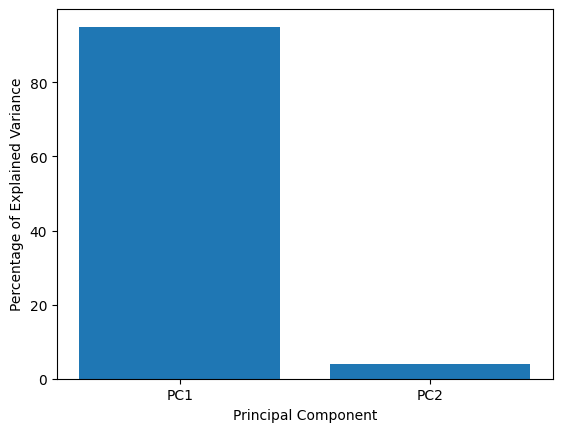

In [44]:
label = ['PC'+str(x) for x in range(1, len(var)+1)]
plt.bar(x=range(1,len(var)+1), height=var,tick_label=label)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

In [45]:
pca.components_

array([[ 0.01071405,  0.30564238,  0.95034345,  0.00980397,  0.054396  ,
         0.01613149],
       [ 0.04311314, -0.05416872, -0.04237669,  0.01653452,  0.91879532,
         0.38594428]])

In [46]:
loading_score = pd.Series(pca.components_[0],index=variable)
loading_score

x0    0.010714
x1    0.305642
x2    0.950343
x3    0.009804
x4    0.054396
x5    0.016131
dtype: float64

In [47]:
sort_ls = loading_score.abs().sort_values(ascending=False)
sort_ls

x2    0.950343
x1    0.305642
x4    0.054396
x5    0.016131
x0    0.010714
x3    0.009804
dtype: float64

In [48]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   jumlah_rw_terdampak        30 non-null     float64
 1   jumlah_kk_terdampak        30 non-null     float64
 2   jumlah_jiwa_terdampak      30 non-null     float64
 3   jumlah_kejadian            30 non-null     float64
 4   jumlah_pengungsi           30 non-null     float64
 5   jumlah_tempat_pengungsian  30 non-null     float64
dtypes: float64(6)
memory usage: 1.5 KB


In [49]:
# # drop kolom yg nilai loading scorenya kecil
# points = points.drop(columns=['jumlah_pengungsi_2023',
#                               'jumlah_tempat_pengungsian_2023'])
# banjir_df = banjir_df.drop(columns=['jumlah_pengungsi_2023',
#                                     'jumlah_tempat_pengungsian_2023'])

# points = points.drop(columns=[
#                               'jumlah_kejadian_2024',
#                               'jumlah_rw_terdampak_2024',
#                               'jumlah_rw_terdampak_2023',
#                               'jumlah_kejadian_2023',
#                               'jumlah_tempat_pengungsian_2024'])
# banjir_df = banjir_df.drop(columns=[
#                               'jumlah_kejadian_2024',
#                               'jumlah_rw_terdampak_2024',
#                               'jumlah_rw_terdampak_2023',
#                               'jumlah_kejadian_2023',
#                               'jumlah_tempat_pengungsian_2024'])

In [50]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   jumlah_rw_terdampak        30 non-null     float64
 1   jumlah_kk_terdampak        30 non-null     float64
 2   jumlah_jiwa_terdampak      30 non-null     float64
 3   jumlah_kejadian            30 non-null     float64
 4   jumlah_pengungsi           30 non-null     float64
 5   jumlah_tempat_pengungsian  30 non-null     float64
dtypes: float64(6)
memory usage: 1.5 KB


In [52]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   jumlah_rw_terdampak        30 non-null     float64
 1   jumlah_kk_terdampak        30 non-null     float64
 2   jumlah_jiwa_terdampak      30 non-null     float64
 3   jumlah_kejadian            30 non-null     float64
 4   jumlah_pengungsi           30 non-null     float64
 5   jumlah_tempat_pengungsian  30 non-null     float64
dtypes: float64(6)
memory usage: 1.5 KB


## Menentukan Banyak Cluster

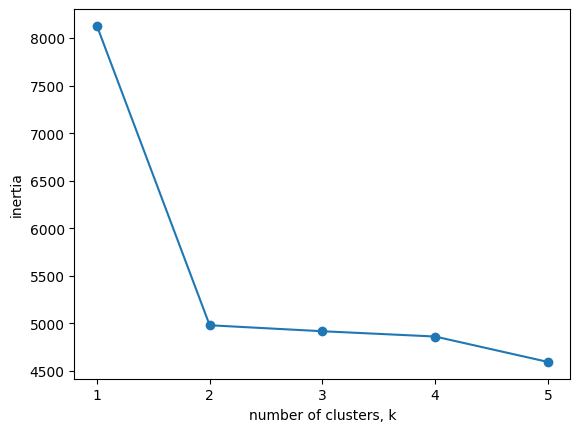

In [53]:
#How many clusters of grain?
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMedoids(n_clusters=k)
    
    # Fit model to samples
    model.fit(points)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

###### kalau dilihat di kolom atas, gap kenaikan dari 1 ke 2, 2 ke 3 besar gapnya. sedangkan 3 ke 4 sudah lumayan kecil, jadi banyak clusternya 3 aja

## Clustering: K-Medoids

In [54]:
#Clustering 2D points

# Create a KMeans instance with 3 clusters: model
model = KMedoids(n_clusters=2)

# Fit model to points
model.fit(points)

new_points=points

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]


## Parallel Coordinate

In [105]:
# Memasukan cluster kedalam plot_df untuk keperluan plot
cluster = pd.DataFrame(labels.astype(str))
# cluster = cluster.replace({'0': 'Cluster 1', '1': 'Cluster 2', '2': 'Cluster 3', '3': 'Cluster 4'})
cluster = cluster.replace({'0': 'Banjir Berat', '1': 'Banjir Ringan'})

plot_df = pd.DataFrame(banjir_df)
plot_df['cluster'] = cluster

## Membuat Variable untuk melihat clustering Kecamatan

In [56]:
show_cluster = pd.DataFrame(banjir_df)
show_cluster['cluster'] = cluster

In [57]:
temp1 = show_cluster.columns.tolist()
temp1 = [temp1[-1]] + temp1[:-1]
show_cluster = show_cluster[temp1]

In [58]:
show_cluster = show_cluster.iloc[:,0:2]

## Persiapan dataset untuk klasifikasi

In [59]:
banjir_df_ori['cluster'] = banjir_df_ori['kecamatan']

In [60]:
banjir_df_ori.head()

,kecamatan,jumlah_rw_terdampak,jumlah_kk_terdampak,jumlah_jiwa_terdampak,jumlah_kejadian,jumlah_pengungsi,jumlah_tempat_pengungsian,cluster
0,KEBAYORAN LAMA,2,0,0,1,0,0,KEBAYORAN LAMA
1,KEBAYORAN LAMA,1,0,0,1,0,0,KEBAYORAN LAMA
2,MAMPANG PRAPATAN,1,0,0,1,0,0,MAMPANG PRAPATAN
3,MAMPANG PRAPATAN,1,0,0,1,0,0,MAMPANG PRAPATAN
4,MAMPANG PRAPATAN,3,0,0,1,0,0,MAMPANG PRAPATAN


In [61]:
show_cluster1 = show_cluster.loc[show_cluster['cluster'] == 'Cluster 1']
show_cluster1

,cluster,kecamatan
0,Cluster 1,CAKUNG
1,Cluster 1,CENGKARENG
3,Cluster 1,CILINCING
9,Cluster 1,JATINEGARA
10,Cluster 1,KALIDERES
12,Cluster 1,KEBAYORAN LAMA
22,Cluster 1,PASAR MINGGU


In [62]:
show_cluster2 = show_cluster.loc[show_cluster['cluster'] == 'Cluster 2']
show_cluster2.iloc[:,1:]

,kecamatan
2,CILANDAK
4,CIPAYUNG
5,CIRACAS
6,DUREN SAWIT
7,GROGOL PETAMBURAN
8,JAGAKARSA
11,KEBAYORAN BARU
13,KEBON JERUK
14,KELAPA GADING
15,KEMBANGAN


In [63]:
banjir_df_ori['cluster'] = banjir_df_ori['cluster'].replace({'CAKUNG': 'Cluster 1', 
                                                             'CENGKARENG': 'Cluster 1',
                                                             'CILANDAK':'Cluster 2',
                                                             'CILINCING':'Cluster 1',
                                                             'CIPAYUNG':'Cluster 2',
                                                             'CIRACAS':'Cluster 2',
                                                             'DUREN SAWIT':'Cluster 2',
                                                             'GROGOL PETAMBURAN':'Cluster 2',
                                                             'JAGAKARSA':'Cluster 2',
                                                             'JATINEGARA':'Cluster 1',
                                                             'KALIDERES':'Cluster 1',
                                                             'KEBAYORAN BARU':'Cluster 2',
                                                             'KEBAYORAN LAMA':'Cluster 1',
                                                             'KEBON JERUK':'Cluster 2',
                                                             'KELAPA GADING':'Cluster 2',
                                                             'KEMBANGAN':'Cluster 2',
                                                             'KOJA':'Cluster 2',
                                                             'KRAMAT JATI':'Cluster 2',
                                                             'MAKASAR':'Cluster 2',
                                                             'MAMPANG PRAPATAN':'Cluster 2',
                                                             'PALMERAH':'Cluster 2',
                                                             'PANCORAN':'Cluster 2',
                                                             'PASAR MINGGU':'Cluster 1',
                                                             'PENJARINGAN':'Cluster 1',
                                                             'PESANGGRAHAN':'Cluster 2',
                                                             'PULOGADUNG':'Cluster 2',
                                                             'TAMAN SARI':'Cluster 2',
                                                             'TANAH ABANG':'Cluster 2',
                                                             'TANJUNG PRIOK':'Cluster 2',
                                                             'TEBET':'Cluster 2'})

In [64]:
banjir_df_ori.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 0 to 275
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   kecamatan                  259 non-null    object
 1   jumlah_rw_terdampak        259 non-null    int32 
 2   jumlah_kk_terdampak        259 non-null    int32 
 3   jumlah_jiwa_terdampak      259 non-null    int32 
 4   jumlah_kejadian            259 non-null    int32 
 5   jumlah_pengungsi           259 non-null    int32 
 6   jumlah_tempat_pengungsian  259 non-null    int32 
 7   cluster                    259 non-null    object
dtypes: int32(6), object(2)
memory usage: 12.1+ KB


## Parallel Coordinate

In [106]:
temp = plot_df.columns.tolist()
temp = [temp[-1]] + temp[:-1]
plot_df = plot_df[temp]

In [107]:
plot_df = plot_df.drop(columns = 'kecamatan')

In [67]:
from pandas.plotting import parallel_coordinates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import paxplot


In [68]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cluster                    30 non-null     object 
 1   jumlah_rw_terdampak        30 non-null     float64
 2   jumlah_kk_terdampak        30 non-null     float64
 3   jumlah_jiwa_terdampak      30 non-null     float64
 4   jumlah_kejadian            30 non-null     float64
 5   jumlah_pengungsi           30 non-null     float64
 6   jumlah_tempat_pengungsian  30 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.8+ KB


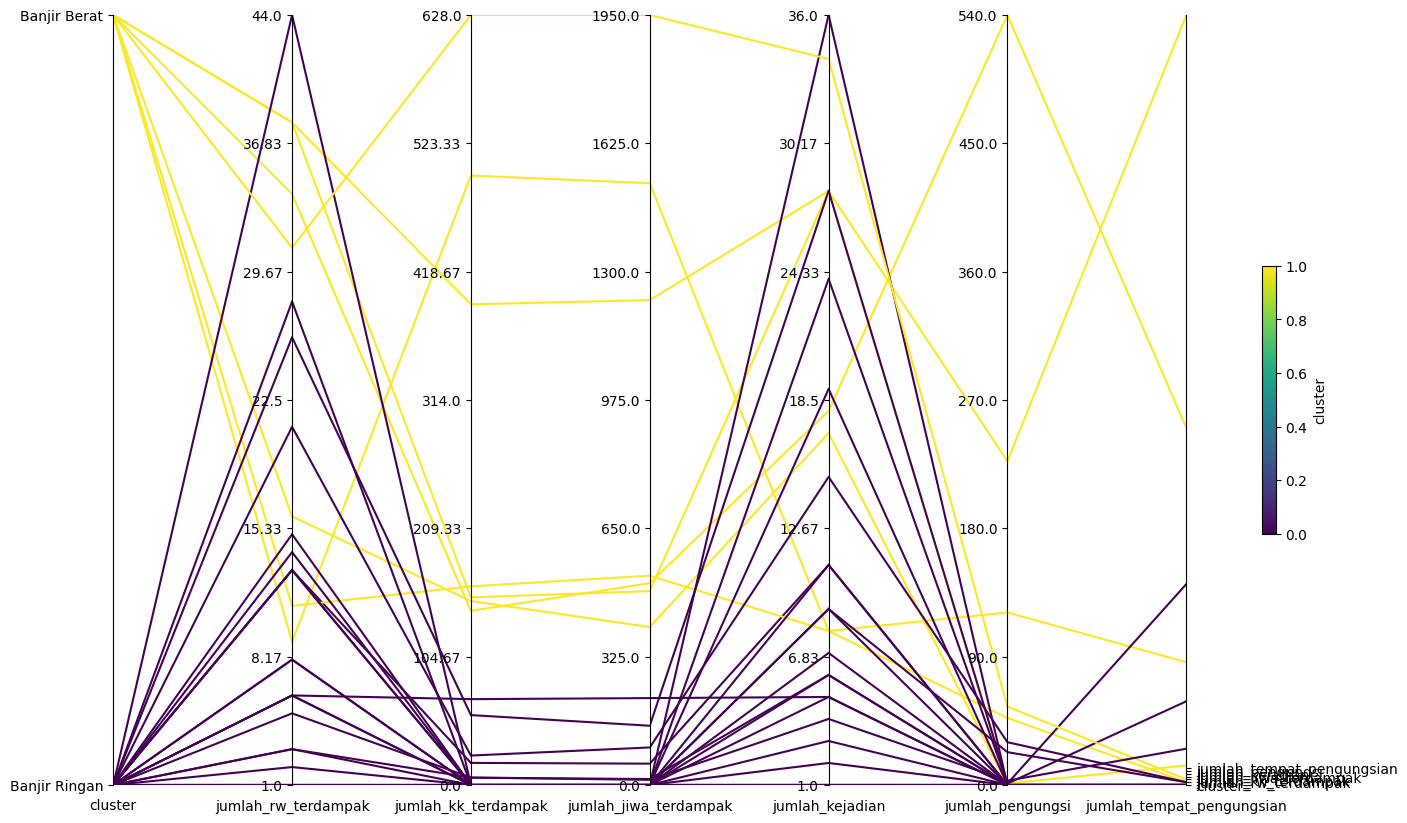

In [108]:
# Import data
cols = plot_df.columns

# Create figure
paxfig = paxplot.pax_parallel(n_axes=len(cols))
paxfig.plot(plot_df.to_numpy())

# Add labels
paxfig.set_labels(cols)

# Set ticks
paxfig.set_ticks(
    ax_idx=-1,
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels= plot_df.columns
)

# Add colorbar
color_col = 0
paxfig.add_colorbar(
    ax_idx=color_col,
    cmap='viridis',
    colorbar_kwargs={'label': cols[color_col]}
)

plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

## Scatter Plot

In [70]:
new_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   jumlah_rw_terdampak        30 non-null     float64
 1   jumlah_kk_terdampak        30 non-null     float64
 2   jumlah_jiwa_terdampak      30 non-null     float64
 3   jumlah_kejadian            30 non-null     float64
 4   jumlah_pengungsi           30 non-null     float64
 5   jumlah_tempat_pengungsian  30 non-null     float64
dtypes: float64(6)
memory usage: 1.5 KB


In [71]:
reversed_labels = 1-labels

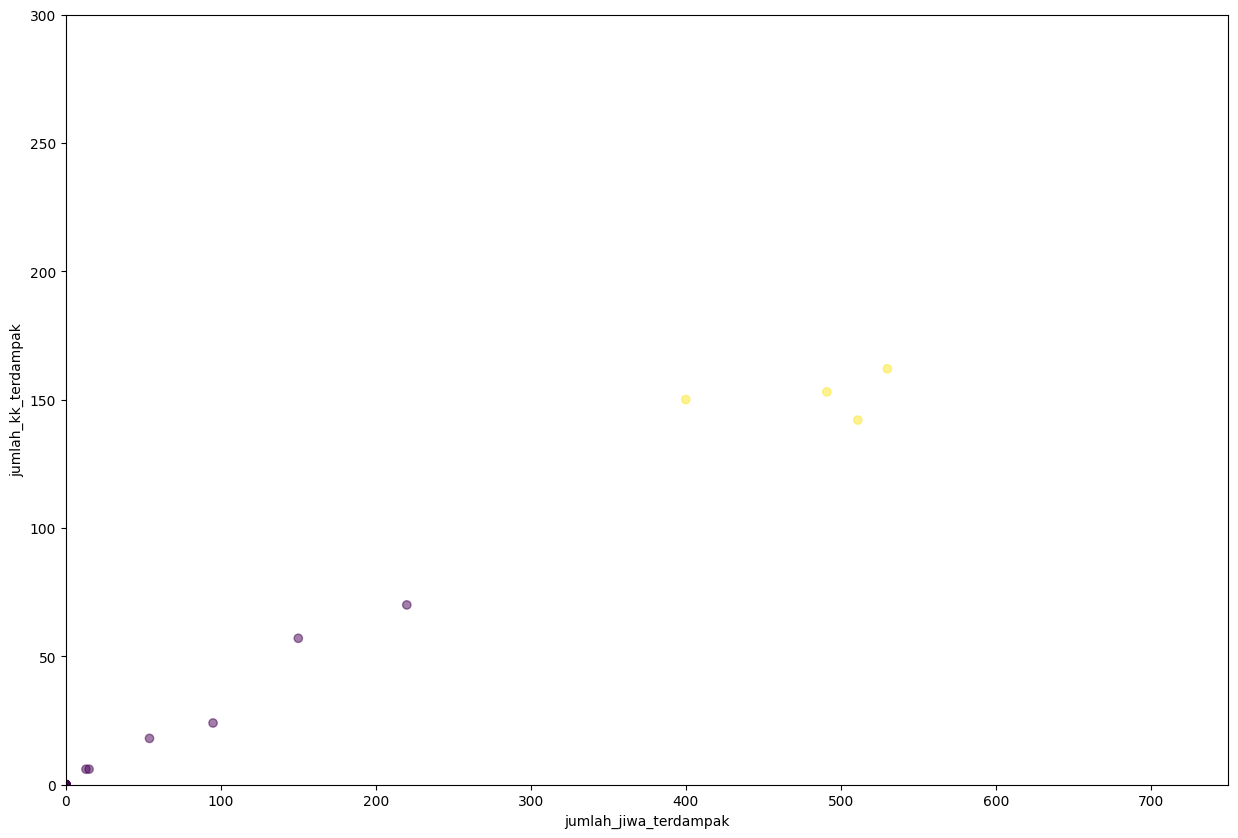

In [72]:
import matplotlib.pyplot as plt
xs = new_points.iloc[:,2]
ys = new_points.iloc[:,1]
plt.scatter(xs,ys,c=reversed_labels,alpha=0.5)
plt.xlim(0, 750)
plt.ylim(0, 300)
plt.xlabel('jumlah_jiwa_terdampak')
plt.ylabel('jumlah_kk_terdampak')
plt.rcParams['figure.figsize'] = [5, 3]
plt.show()

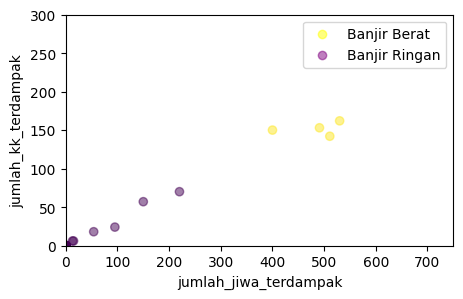

In [119]:
import matplotlib.pyplot as plt

# Data
xs = new_points.iloc[:, 2]
ys = new_points.iloc[:, 1]

# Plot scatter
plt.scatter(xs, ys, c=reversed_labels, alpha=0.5)

# Memberikan informasi cluster pada legend
cluster_colors = {0: 'yellow', 1: 'purple'}
cluster_labels = {0: 'Banjir Berat', 1: 'Banjir Ringan'}
for cluster, color in cluster_colors.items():
    plt.scatter([], [], c=color, alpha=0.5, label=cluster_labels[cluster])
# for cluster, color in cluster_colors.items():
    # plt.scatter([], [], c=color, alpha=0.5, label=f'Cluster {cluster+1}')

# Mengatur tampilan plot
plt.xlim(0, 750)
plt.ylim(0, 300)
plt.xlabel('jumlah_jiwa_terdampak')
plt.ylabel('jumlah_kk_terdampak')
plt.rcParams['figure.figsize'] = [5, 3]
plt.legend(loc='best')
plt.show()

## Persiapan Dataset untuk Klasifikasi

In [74]:
y = banjir_df_ori.loc[:,['cluster']]

In [75]:
y

,cluster
0,Cluster 1
1,Cluster 1
2,Cluster 2
3,Cluster 2
4,Cluster 2
...,...
271,Cluster 2
272,Cluster 2
273,Cluster 1
274,Cluster 1


In [76]:
ycluster = pd.get_dummies(y, columns=['cluster'])
y_cluster2 = ycluster.loc[:,['cluster_Cluster 2']]
y_cluster1 = ycluster.loc[:,['cluster_Cluster 1']]

In [77]:
x = banjir_df_ori.iloc[:,1:7]

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

x_train, x_test, y_train, y_test = train_test_split(x, y_cluster1, test_size= 0.4, random_state=42, stratify= y_cluster1)

In [79]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 229 to 142
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   jumlah_rw_terdampak        155 non-null    int32
 1   jumlah_kk_terdampak        155 non-null    int32
 2   jumlah_jiwa_terdampak      155 non-null    int32
 3   jumlah_kejadian            155 non-null    int32
 4   jumlah_pengungsi           155 non-null    int32
 5   jumlah_tempat_pengungsian  155 non-null    int32
dtypes: int32(6)
memory usage: 4.8 KB


In [80]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 99 to 177
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   jumlah_rw_terdampak        104 non-null    int32
 1   jumlah_kk_terdampak        104 non-null    int32
 2   jumlah_jiwa_terdampak      104 non-null    int32
 3   jumlah_kejadian            104 non-null    int32
 4   jumlah_pengungsi           104 non-null    int32
 5   jumlah_tempat_pengungsian  104 non-null    int32
dtypes: int32(6)
memory usage: 3.2 KB


## Regresi Logistik

In [81]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

reglog = sm.OLS(y_train.astype(float), x_train).fit()
print(reglog.summary())

                                 OLS Regression Results                                
Dep. Variable:      cluster_Cluster 1   R-squared (uncentered):                   0.428
Model:                            OLS   Adj. R-squared (uncentered):              0.405
Method:                 Least Squares   F-statistic:                              18.59
Date:                Mon, 15 Jul 2024   Prob (F-statistic):                    4.57e-16
Time:                        17:48:21   Log-Likelihood:                         -105.62
No. Observations:                 155   AIC:                                      223.2
Df Residuals:                     149   BIC:                                      241.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [82]:
ypredik = reglog.predict(x_test)
ypredik.head()

99     0.239160
169    0.701838
66     0.730831
91     0.239160
137    0.239160
dtype: float64

In [83]:
yp = (ypredik >= 0.5).astype(int)
yp.head()

99     0
169    1
66     1
91     0
137    0
dtype: int32

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

       False       0.61      0.83      0.70        63
        True       0.42      0.20      0.27        41

    accuracy                           0.58       104
   macro avg       0.52      0.51      0.48       104
weighted avg       0.54      0.58      0.53       104



## K_Neighbour

In [85]:
xtr = x_train.iloc[:,:2]
xte = x_test.iloc[:,:2]

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

C:\Users\IRSYAD KUSNADI\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [87]:
prediksi_knn = knn.predict(x_test)
print(prediksi_knn)

[False  True  True False False False False False False False False False
 False False  True False False False False False False  True  True False
 False False False False False False  True False False  True False False
 False False False False False False  True False False False False False
  True False False False  True False False False False False False False
 False False False False False  True  True False  True  True  True  True
  True  True False False False False  True False  True False False False
  True False False False False  True False False False False False False
 False False False False  True False False  True]


In [88]:
print(classification_report(y_test, prediksi_knn))

              precision    recall  f1-score   support

       False       0.64      0.81      0.71        63
        True       0.50      0.29      0.37        41

    accuracy                           0.61       104
   macro avg       0.57      0.55      0.54       104
weighted avg       0.58      0.61      0.58       104



## Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [90]:
#Learning
gnb.fit(x_train, y_train)


prediksi_gnb = gnb.predict(x_test)
print(prediksi_gnb)

[False  True False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False  True False False
 False False False False False False False False  True False False False
 False False False False False False  True  True False False False False
 False False False False False False False False  True False  True False
  True False False False  True False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False]


C:\Users\IRSYAD KUSNADI\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
print(classification_report(y_test, prediksi_gnb))

              precision    recall  f1-score   support

       False       0.65      0.95      0.77        63
        True       0.75      0.22      0.34        41

    accuracy                           0.66       104
   macro avg       0.70      0.59      0.56       104
weighted avg       0.69      0.66      0.60       104



## Decision Tree

In [92]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=6)

In [93]:
#learning
dt.fit(x_train,y_train)

prediksi_dt = dt.predict(x_test)
print(prediksi_dt)

[False  True  True False False False False False False False False False
  True False  True False False False False False False False  True False
 False False False False False False  True False False  True False False
 False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False False  True False False  True False  True False
 False False False False  True False  True False False False False False
  True False False False False  True False False False False False False
 False False False False  True False False  True]


In [94]:
print(classification_report(y_test, prediksi_dt))

              precision    recall  f1-score   support

       False       0.64      0.87      0.74        63
        True       0.56      0.24      0.34        41

    accuracy                           0.62       104
   macro avg       0.60      0.56      0.54       104
weighted avg       0.61      0.62      0.58       104



## Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# instatiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators= 150, random_state= 42)

In [96]:
#Learning
rf.fit(x_train,y_train)

prediksi_rf = rf.predict(x_test)
print(prediksi_rf)

C:\Users\IRSYAD KUSNADI\AppData\Local\Temp\ipykernel_18504\3961175777.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


[0.32689124 0.46495238 0.21906349 0.32689124 0.32689124 0.3749418
 0.32689124 0.32689124 0.41545552 0.32689124 0.32689124 0.32689124
 0.83150242 0.32689124 0.90372222 0.2180481  0.41545552 0.32689124
 0.32689124 0.3749418  0.41545552 0.60103175 0.90877778 0.32689124
 0.3749418  0.41545552 0.32689124 0.2180481  0.32689124 0.32689124
 0.5        0.32689124 0.32689124 0.90777778 0.32689124 0.32689124
 0.32689124 0.32689124 0.32689124 0.32689124 0.32689124 0.3749418
 0.49712963 0.41545552 0.69722222 0.2180481  0.41545552 0.32689124
 0.49712963 0.32689124 0.2180481  0.32689124 0.49712963 0.32689124
 0.65226587 0.54912732 0.32689124 0.32689124 0.32689124 0.41545552
 0.41545552 0.2180481  0.32689124 0.32689124 0.32689124 0.61422944
 0.49712963 0.32689124 0.88666667 0.67255556 0.75620155 0.49712963
 0.36577778 0.49712963 0.3749418  0.32689124 0.8675     0.2180481
 0.90372222 0.32689124 0.49712963 0.32689124 0.32689124 0.41545552
 0.77620155 0.32689124 0.32689124 0.32689124 0.32689124 0.6142294

In [97]:
ranf = (prediksi_rf >= 0.5).astype(int)
print(ranf)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1]


In [98]:
print(classification_report(y_test, ranf))

              precision    recall  f1-score   support

       False       0.64      0.86      0.73        63
        True       0.53      0.24      0.33        41

    accuracy                           0.62       104
   macro avg       0.58      0.55      0.53       104
weighted avg       0.59      0.62      0.57       104



## Support Vector Machine

In [99]:
from sklearn import svm
clf = svm.SVC(C=13,kernel="poly")
# kernel="linear/poly/rbf/sigmoid"

In [100]:
clf.fit(x_train,y_train)

C:\Users\IRSYAD KUSNADI\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=13, kernel='poly')

In [101]:
prediksi_svm = clf.predict(x_test)
print(prediksi_svm)

[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False  True False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False]


In [102]:
print(classification_report(y_test, prediksi_svm))

              precision    recall  f1-score   support

       False       0.63      0.98      0.77        63
        True       0.83      0.12      0.21        41

    accuracy                           0.64       104
   macro avg       0.73      0.55      0.49       104
weighted avg       0.71      0.64      0.55       104

